In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
import pytz
from pytz import common_timezones, all_timezones
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline
from datetime import datetime

http://greenteapress.com/wp/think-bayes/

Roger Labbe has transformed _Think Bayes_ into IPython notebooks where you can modify and run the code

There are several excellent modules for doing Bayesian statistics in Python, including pymc and OpenBUGS. I chose not to use them for this book because you need a fair amount of background knowledge to get started with these modules, and I want to keep the prerequisites minimal. If you know Python and a little bit about probability, you are ready to start this book.

## Chapter 1 Bayes's Theorem

### Conditional probability

The usual notation for conditional probability is p(A|B), which is the probability of A given that B is true.

### Conjoint probability

In general, the probability of a conjunction is

p(A  and  B) = p(A) p(B|A) 

### The cookie problem

We’ll get to Bayes’s theorem soon, but I want to motivate it with an example called the cookie problem.1 Suppose there are two bowls of cookies. Bowl 1 contains 30 vanilla cookies and 10 chocolate cookies. Bowl 2 contains 20 of each.
Now suppose you choose one of the bowls at random and, without looking, select a cookie at random. The cookie is vanilla. What is the probability that it came from Bowl 1?

This is a conditional probability; we want p(Bowl 1 | vanilla), but it is not obvious how to compute it. If I asked a different question—the probability of a vanilla cookie given Bowl 1—it would be easy:

p(vanilla | Bowl 1) = 3/4 
Sadly, p(A|B) is not the same as p(B|A), but there is a way to get from one to the other: Bayes’s theorem.

### Bayes's theorem

$
p(A|B) = \frac{ p(A) p(B|A)}{p(B)}
$ 

And that’s Bayes’s theorem! It might not look like much, but it turns out to be surprisingly powerful.

$
p(B_1|V) = \frac{(1/2) (3/4)}{ (1/2)(3/4) + (1/2)(1/2)} = 3/5
$

So the vanilla cookie is evidence in favor of the hypothesis that we chose Bowl 1, because vanilla cookies are more likely to come from Bowl 1.

This example demonstrates one use of Bayes’s theorem: it provides a strategy to get from p(B|A) to p(A|B). This strategy is useful in cases, like the cookie problem, where it is easier to compute the terms on the right side of Bayes’s theorem than the term on the left.

### The diachronic interpretation

There is another way to think of Bayes’s theorem: it gives us a way to update the probability of a hypothesis, H, in light of some body of data, D.
This way of thinking about Bayes’s theorem is called the diachronic interpretation. “Diachronic” means that something is happening over time; in this case the probability of the hypotheses changes, over time, as we see new data.

Rewriting Bayes’s theorem with H and D yields:

$
p(H|D) = \frac{p(H)p(D|H)}{p(D)}
$

In this interpretation, each term has a name:

* p(H) is the probability of the hypothesis before we see the data, called the prior probability, or just **prior**.
* p(H|D) is what we want to compute, the probability of the hypothesis after we see the data, called the **posterior**.
* p(D|H) is the probability of the data under the hypothesis, called the **likelihood**.
* p(D) is the probability of the data under any hypothesis, called the **normalizing constant**.

Sometimes we can compute the prior based on background information. For example, the cookie problem specifies that we choose a bowl at random with equal probability.
In other cases the prior is subjective; that is, reasonable people might disagree, either because they use different background information or because they interpret the same information differently.

The likelihood is usually the easiest part to compute. In the cookie problem, if we know which bowl the cookie came from, we find the probability of a vanilla cookie by counting.

The normalizing constant can be tricky. It is supposed to be the probability of seeing the data under any hypothesis at all, but in the most general case it is hard to nail down what that means.

Most often we simplify things by specifying a set of hypotheses that are

**Mutually exclusive**:
At most one hypothesis in the set can be true, and
**Collectively exhaustive**:
There are no other possibilities; at least one of the hypotheses has to be true.
I use the word suite for a set of hypotheses that has these properties.


In the cookie problem, there are only two hypotheses—the cookie came from Bowl 1 or Bowl 2—and they are mutually exclusive and collectively exhaustive.

In that case we can compute p(D) using the law of total probability, which says that if there are two exclusive ways that something might happen, you can add up the probabilities like this:

$
p(D) = p(B1) p(D|B1) + p(B2) p(D|B2) 
$


Plugging in the values from the cookie problem, we have


$
p(D) = (1/2) (3/4) + (1/2) (1/2) = 5/8 
$

### The M&M problem

M&M’s are small candy-coated chocolates that come in a variety of colors. Mars, Inc., which makes M&M’s, changes the mixture of colors from time to time.
In 1995, they introduced blue M&M’s. Before then, the color mix in a bag of plain M&M’s was 30% Brown, 20% Yellow, 20% Red, 10% Green, 10% Orange, 10% Tan. Afterward it was 24% Blue , 20% Green, 16% Orange, 14% Yellow, 13% Red, 13% Brown.

Suppose a friend of mine has two bags of M&M’s, and he tells me that one is from 1994 and one from 1996. He won’t tell me which is which, but he gives me one M&M from each bag. One is yellow and one is green. What is the probability that the yellow one came from the 1994 bag?

This problem is similar to the cookie problem, with the twist that I draw one sample from each bowl/bag. This problem also gives me a chance to demonstrate the table method, which is useful for solving problems like this on paper. In the next chapter we will solve them computationally.

The first step is to enumerate the hypotheses. The bag the yellow M&M came from I’ll call Bag 1; I’ll call the other Bag 2. So the hypotheses are:

* A: Bag 1 is from 1994, which implies that Bag 2 is from 1996.
* B: Bag 1 is from 1996 and Bag 2 is from 1994.

Now we construct a table with a row for each hypothesis and a column for each term in Bayes's theorem:
 
| | p(H) | p(D &#124; H)  | p(H)p(D &#124; H) | p(H &#124; D) | 
|:-----:|:--------------:|:-----------------:|:-------------:|:---------------------:|
|A| 1/2 | (20)(20) | 200 |  20/27     |
|B| 1/2 | (14)(10)  | 70   |   7/27 |   

The second column has the likelihoods, which follow from the information in the problem. For example, if A is true, the yellow M&M came from the 1994 bag with probability 20%, and the green came from the 1996 bag with probability 20%. If B is true, the yellow M&M came from the 1996 bag with probability 14%, and the green came from the 1994 bag with probability 10%. Because the selections are independent, we get the conjoint probability by multiplying.


The third column is just the product of the previous two. The sum of this column, 270, is the normalizing constant. To get the last column, which contains the posteriors, we divide the third column by the normalizing constant.

That’s it. Simple, right?


Well, you might be bothered by one detail. I write p(D|H) in terms of percentages, not probabilities, which means it is off by a factor of 10,000. But that cancels out when we divide through by the normalizing constant, so it doesn’t affect the result.

When the set of hypotheses is mutually exclusive and collectively exhaustive, you can multiply the likelihoods by any factor, if it is convenient, as long as you apply the same factor to the entire column.

### The Monty Hall problem

The Monty Hall problem might be the most contentious question in the history of probability. The scenario is simple, but the correct answer is so counterintuitive that many people just can’t accept it, and many smart people have embarrassed themselves not just by getting it wrong but by arguing the wrong side, aggressively, in public.

Monty Hall was the original host of the game show Let’s Make a Deal. The Monty Hall problem is based on one of the regular games on the show. If you are on the show, here’s what happens:

* Monty shows you three closed doors and tells you that there is a prize behind each door: one prize is a car, the other two are less valuable prizes like peanut butter and fake finger nails. The prizes are arranged at random.
* The object of the game is to guess which door has the car. If you guess right, you get to keep the car.
* You pick a door, which we will call Door A. We’ll call the other doors B and C.
* Before opening the door you chose, Monty increases the suspense by opening either Door B or C, whichever does not have the car. (If the car is actually behind Door A, Monty can safely open B or C, so he chooses one at random.)
* Then Monty offers you the option to stick with your original choice or switch to the one remaining unopened door.

The question is, should you “stick” or “switch” or does it make no difference?
Most people have the strong intuition that it makes no difference. There are two doors left, they reason, so the chance that the car is behind Door A is 50%.

But that is wrong. In fact, the chance of winning if you stick with Door A is only 1/3; if you switch, your chances are 2/3.

By applying Bayes’s theorem, we can break this problem into simple pieces, and maybe convince ourselves that the correct answer is, in fact, correct.

To start, we should make a careful statement of the data. In this case D consists of two parts: Monty chooses Door B and there is no car there.

Next we define three hypotheses: A, B, and C represent the hypothesis that the car is behind Door A, Door B, or Door C. Again, let’s apply the table method:


| | Prior | Likelihood | | Posterior |
|:------------:|:-------------------:|:------------------:|:--------------:|:-----------------------:|
| | p(H) | p(D &#124; H) | p(H) p(D &#124; H) | p(H &#124; D) |
|A| 1/3 | 1/2 | 1/6 | 1/3 | 
|B| 1/3 | 0 | 0 | 0 |
|C| 1/3 | 1 | 1/3 | 2/3 | 


In [5]:
df = pd.read_csv('PathwayComplianceCustomSearch.csv',skiprows=[0])

In [6]:
df.head()

,Diagnosis Date,Patient Name,MRN,Cancer Type,Event Type,Event,Event Value,Provider,Compliance
0,3/24/14 12:00 AM,"Taylor, Elizabeth",71587,Breast,StructuredData,Diagnosis Date,2014/03/24 00:00:00.000,Fontaine Annette,YES
1,3/24/14 12:00 AM,"Taylor, Elizabeth",71587,Breast,StructuredData,Stage,Stage IIB,Fontaine Annette,YES
2,3/24/14 12:00 AM,"Taylor, Elizabeth",71587,Breast,StructuredData,Staging Date,2014/04/22 00:00:00.000,Fontaine Annette,YES
3,3/24/14 12:00 AM,"Taylor, Elizabeth",71587,Breast,StructuredData,Staging Components,M0|pN1a|T2,Fontaine Annette,YES
4,3/24/14 12:00 AM,"Taylor, Elizabeth",71587,Breast,StructuredData,Performance Status,1,Fontaine Annette,YES


In [13]:
dfsmall = df[['Patient Name','MRN','Cancer Type']].copy()

In [14]:
dfsmall.shape

(5445, 3)

In [16]:
dfsmall.columns

Index([u'Patient Name', u'MRN', u'Cancer Type'], dtype='object')

In [18]:
dftiny = dfsmall[dfsmall['Patient Name'] != 'Patient Name'].drop_duplicates()

In [19]:
dftiny.shape

(422, 3)

In [20]:
dftiny.head()

,Patient Name,MRN,Cancer Type
0,"Taylor, Elizabeth",71587,Breast
11,"Bumgarner Kirby, Hue",25684,Breast
20,"Pena, Louise",75975,Breast
29,"Yazzie, Alfreda",76122,Breast
41,"Kahle, Christine",76141,Breast


In [21]:
dftiny

,Patient Name,MRN,Cancer Type
0,"Taylor, Elizabeth",71587,Breast
11,"Bumgarner Kirby, Hue",25684,Breast
20,"Pena, Louise",75975,Breast
29,"Yazzie, Alfreda",76122,Breast
41,"Kahle, Christine",76141,Breast
50,"Davis, Sandra",76164,Breast
61,"Bhakta, Sarashvatiben",76239,Breast
66,"Bhakta,",76239,Breast
68,Sarashvatiben,76239,Breast
72,"Adams, Carolyn",76267,Breast


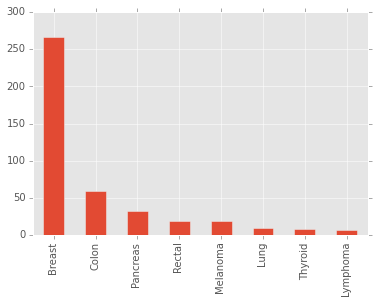

In [22]:
dftiny['Cancer Type'].value_counts().plot(kind='bar')

| | Prior | Likelihood | | Posterior |
|:------------:|:-------------------:|:------------------:|:--------------:|:-----------------------:|
| | p(H) | p(D &#124; H) | p(H) p(D &#124; H) | p(H &#124; D) |
|A| 1/3 | 1/2 | 1/6 | 1/3 | 
|B| 1/3 | 0 | 0 | 0 |
|C| 1/3 | 1 | 1/3 | 2/3 | 


There are many variations of the Monty Hall problem. One of the strengths of the Bayesian approach is that it generalizes to handle these variations.




## Chapter 2 Computational Statistics

### Distributions



In [23]:
from thinkbayes import Pmf

In [24]:
pmf = Pmf()
for x in [1,2,3,4,5,6]:
    pmf.Set(x, 1/6.0)

In [26]:
help(pmf)

Help on Pmf in module thinkbayes object:

class Pmf(_DictWrapper)
 |  Represents a probability mass function.
 |  
 |  Values can be any hashable type; probabilities are floating-point.
 |  Pmfs are not necessarily normalized.
 |  
 |  Method resolution order:
 |      Pmf
 |      _DictWrapper
 |      __builtin__.object
 |  
 |  Methods defined here:
 |  
 |  AddConstant(self, other)
 |      Computes the Pmf of the sum a constant and  values from self.
 |      
 |      other: a number
 |      
 |      returns: new Pmf
 |  
 |  AddPmf(self, other)
 |      Computes the Pmf of the sum of values drawn from self and other.
 |      
 |      other: another Pmf
 |      
 |      returns: new Pmf
 |  
 |  CredibleInterval(self, percentage=90)
 |      Computes the central credible interval.
 |      
 |      If percentage=90, computes the 90% CI.
 |      
 |      Args:
 |          percentage: float between 0 and 100
 |      
 |      Returns:
 |          sequence of two floats, low and high
 |  
 | 

### The cookie problem

In the context of Bayes’s theorem, it is natural to use a Pmf to map from each hypothesis to its probability. In the cookie problem, the hypotheses are B1 and B2. In Python, I represent them with strings:

In [27]:
pmf = Pmf()
pmf.Set('Bowl 1', 0.5)
pmf.Set('Bowl 2', 0.5)

To update the distribution based on new data (the vanilla cookie), we multiply each prior by the corresponding likelihood. The likelihood of drawing a vanilla cookie from Bowl 1 is 3/4. The likelihood for Bowl 2 is 1/2.

In [28]:
pmf.Mult('Bowl 1', 0.75)
pmf.Mult('Bowl 2', 0.5)

In [29]:
pmf.Normalize()

0.625

In [30]:
print pmf.Prob('Bowl 1')

0.6


In [31]:
print pmf.Prob('Bowl 2')

0.4


### The Bayesian framework



In [33]:
class Cookie(Pmf):

    def __init__(self, hypos):
        Pmf.__init__(self)
        for hypo in hypos:
            self.Set(hypo, 1)
        self.Normalize()
        
    def Update(self, data):
        for hypo in self.Values():
            like = self.Likelihood(data, hypo)
            self.Mult(hypo, like)
        self.Normalize()   
        
    mixes = {
        'Bowl 1':dict(vanilla=0.75, chocolate=0.25),
        'Bowl 2':dict(vanilla=0.5, chocolate=0.5),
        }

    def Likelihood(self, data, hypo):
        mix = self.mixes[hypo]
        like = mix[data]
        return like
    

In [34]:
hypos = ['Bowl 1', 'Bowl 2']
pmf = Cookie(hypos)

In [35]:
pmf.Update('vanilla')

In [36]:
for hypo, prob in pmf.Items():
    print hypo, prob

Bowl 2 0.4
Bowl 1 0.6


In [37]:
dataset = ['vanilla', 'chocolate', 'vanilla']
for data in dataset:
    pmf.Update(data)

In [38]:
for hypo, prob in pmf.Items():
    print hypo, prob

Bowl 2 0.372093023256
Bowl 1 0.627906976744


In [39]:
class Monty(Pmf):

    def __init__(self, hypos):
        Pmf.__init__(self)
        for hypo in hypos:
            self.Set(hypo, 1)
        self.Normalize()
        
    def Update(self, data):
        for hypo in self.Values():
            like = self.Likelihood(data, hypo)
            self.Mult(hypo, like)
        self.Normalize()
        
    def Likelihood(self, data, hypo):
        if hypo == data:
            return 0
        elif hypo == 'A':
            return 0.5
        else:
            return 1
        
        
        
    

In [40]:
hypos = 'ABC'
pmf = Monty(hypos)

In [41]:
data = 'B'
pmf.Update(data)

In [42]:
for hypo, prob in pmf.Items():
    print hypo, prob

A 0.333333333333
C 0.666666666667
B 0.0


The implementation of Suite is in thinkbayes.py. To use Suite, you should write a class that inherits from it and provides Likelihood. For example, here is the solution to the Monty Hall problem rewritten to use Suite:

In [43]:
from thinkbayes import Suite

class Monty(Suite):
    
    def Likelihood(self, data, hypo):
        if hypo == data:
            return 0
        elif hypo == 'A':
            return 0.5
        else:
            return 1

In [44]:
suite = Monty('ABC')

In [45]:
suite.Update('B')

0.5

In [46]:
suite.Print()

A 0.333333333333
B 0.0
C 0.666666666667


In [47]:
mix94 = dict(brown=30,
                 yellow=20,
                 red=20,
                 green=10,
                 orange=10,
                 tan=10)

mix96 = dict(blue=24,
                 green=20,
                 orange=16,
                 yellow=14,
                 red=13,
                 brown=13)

hypoA = dict(bag1=mix94, bag2=mix96)
hypoB = dict(bag1=mix96, bag2=mix94)


In [50]:
hypotheses = dict(A=hypoA,B=hypoB)

In [51]:
hypotheses

{'A': {'bag1': {'brown': 30,
   'green': 10,
   'orange': 10,
   'red': 20,
   'tan': 10,
   'yellow': 20},
  'bag2': {'blue': 24,
   'brown': 13,
   'green': 20,
   'orange': 16,
   'red': 13,
   'yellow': 14}},
 'B': {'bag1': {'blue': 24,
   'brown': 13,
   'green': 20,
   'orange': 16,
   'red': 13,
   'yellow': 14},
  'bag2': {'brown': 30,
   'green': 10,
   'orange': 10,
   'red': 20,
   'tan': 10,
   'yellow': 20}}}

In [56]:
from thinkbayes import Suite

class M_and_M(Suite):
    
    
    
    def Likelihood(self, data, hypo):
        bag, color = data
        mix = self.hypotheses[hypo][bag]
        like = mix[color]
        return like

    mix94 = dict(brown=30,
                 yellow=20,
                 red=20,
                 green=10,
                 orange=10,
                 tan=10)

    mix96 = dict(blue=24,
                 green=20,
                 orange=16,
                 yellow=14,
                 red=13,
                 brown=13)

    hypoA = dict(bag1=mix94, bag2=mix96)
    hypoB = dict(bag1=mix96, bag2=mix94)
    
    hypotheses = dict(A=hypoA, B=hypoB)
    
    
    

In [57]:
hypotheses

{'A': {'bag1': {'brown': 30,
   'green': 10,
   'orange': 10,
   'red': 20,
   'tan': 10,
   'yellow': 20},
  'bag2': {'blue': 24,
   'brown': 13,
   'green': 20,
   'orange': 16,
   'red': 13,
   'yellow': 14}},
 'B': {'bag1': {'blue': 24,
   'brown': 13,
   'green': 20,
   'orange': 16,
   'red': 13,
   'yellow': 14},
  'bag2': {'brown': 30,
   'green': 10,
   'orange': 10,
   'red': 20,
   'tan': 10,
   'yellow': 20}}}

In [58]:
suite = M_and_M('AB')

In [59]:
suite.Update(('bag1','yellow'))
suite.Update(('bag2','green'))

15.882352941176471

In [60]:
suite.Print()

A 0.740740740741
B 0.259259259259


In [61]:
suite.__dict__

{'d': {'A': 0.7407407407407407, 'B': 0.2592592592592592},
 'log': False,
 'name': ''}

In [62]:
help(suite)

Help on M_and_M in module __main__ object:

class M_and_M(thinkbayes.Suite)
 |  Method resolution order:
 |      M_and_M
 |      thinkbayes.Suite
 |      thinkbayes.Pmf
 |      thinkbayes._DictWrapper
 |      __builtin__.object
 |  
 |  Methods defined here:
 |  
 |  Likelihood(self, data, hypo)
 |  
 |  ----------------------------------------------------------------------
 |  Data and other attributes defined here:
 |  
 |  hypoA = {'bag1': {'brown': 30, 'green': 10, 'orange': 10, 'red': 20, '...
 |  
 |  hypoB = {'bag1': {'blue': 24, 'brown': 13, 'green': 20, 'orange': 16, ...
 |  
 |  hypotheses = {'A': {'bag1': {'brown': 30, 'green': 10, 'orange': 10, '...
 |  
 |  mix94 = {'brown': 30, 'green': 10, 'orange': 10, 'red': 20, 'tan': 10,...
 |  
 |  mix96 = {'blue': 24, 'brown': 13, 'green': 20, 'orange': 16, 'red': 13...
 |  
 |  ----------------------------------------------------------------------
 |  Methods inherited from thinkbayes.Suite:
 |  
 |  LogLikelihood(self, data, hypo

In [63]:
suite.hypoA

{'bag1': {'brown': 30,
  'green': 10,
  'orange': 10,
  'red': 20,
  'tan': 10,
  'yellow': 20},
 'bag2': {'blue': 24,
  'brown': 13,
  'green': 20,
  'orange': 16,
  'red': 13,
  'yellow': 14}}

### 2.8 Exercises

#### Exercise 1
In Section 2.3 I said that the solution to the cookie problem generalizes to the case where we draw multiple cookies with replacement. But in the more likely scenario where we eat the cookies we draw, the likelihood of each draw depends on the previous draws. 
Modify the solution in this chapter to handle selection without replacement. Hint: add instance variables to ```Cookie``` to represent the hypothetical state of the bowls, and modify ```Likelihood``` accordingly. You might want to define a ```Bowl``` object.

In [79]:
from thinkbayes import Suite

class CookieMonster(Suite):
    
    bowl1 = dict(vanilla=30,chocolate=10)
    bowl2 = dict(vanilla=20,chocolate=20)
    
    
    bowl1total = sum(bowl1.values())
    bowl2total = sum(bowl2.values())
    
    
    vb1 = bowl1['vanilla']/bowl1total
    cb1 = bowl1['chocolate']/bowl1total
    
    vb2 = bowl2['vanilla']/bowl2total
    cb2 = bowl2['chocolate']/bowl2total
    
    
    
    mixes = {
        'Bowl 1':dict(vanilla=0.75, chocolate=0.25),
        'Bowl 2':dict(vanilla=0.5, chocolate=0.5),
        }
    
    
    def Likelihood(self, data, hypo):
        mix = self.mixes[hypo]
        like = mix[data]
        return like

In [71]:
bowl1 = dict(vanilla=30.,chocolate=10.)

In [78]:
bowl1['vanilla']/sum(bowl1.values())

0.75

In [73]:
bowl1['chocolate']/bowl1['vanilla']

0.3333333333333333

In [74]:
bowl1

{'chocolate': 10.0, 'vanilla': 30.0}

In [77]:
sum(bowl1.values())

40.0

## Need to review classes, etc.

## Chapter 15 Classes and objects


A user-defined type is also called a **class**.

In [81]:
class Point(object):
    """Represents a point in 2-D space."""
    
    def __init__(self, )x=0, y=0):
        self.x = x
        self.y = y

In [83]:
print Point


<class '__main__.Point'>


In [84]:
blank = Point()

In [85]:
print blank

In [86]:
blank.x = 3.0
blank.y = 4.0

In [87]:
print blank.y

4.0


In [88]:
x = blank.x
print x

3.0


In [89]:
print '(%g, %g)' % (blank.x, blank.y)

(3, 4)


In [91]:
import math
distance = math.sqrt(blank.x**2 + blank.y**2)
print distance

5.0


In [92]:
def print_point(p):
    print '(%g, %g)' % (p.x, p.y)

In [93]:
print_point(blank)

(3, 4)


In [94]:
def distance_between_points(p,q):
    """takes two Points p and q and returns the 
    distance between them."""
    dx = p.x - q.x
    dy = p.y - q.y
    distance = math.sqrt(dx**2 + dy**2)
    return distance

In [96]:
class Rectangle(object):
    """Represents a rectangle.
    
    attributes: width, height, corner."""

In [97]:
box = Rectangle()
box.width = 100.0
box.height = 200.0
box.corner = Point()
box.corner.x = 0.0
box.corner.y = 0.0

In [99]:
def find_center(rect):
    p = Point()
    p.x = rect.corner.x + rect.width/2.0
    p.y = rect.corner.y + rect.height/2.0
    return p

In [100]:
center = find_center(box)

In [101]:
print_point(center)

(50, 100)


### Objects are mutable

You can change the state of an object by making an assignment to one of its attributes.
For example, to change the size of a rectangle without changing its position, you can 
modify its values of ```width``` and ```height```.

In [102]:
box.width += 50
box.height += 100

In [103]:
def grow_rectangle(rect, dwidth, dheight):
    rect.width += dwidth
    rect.height += dheight

In [104]:
print box.width

150.0


In [105]:
print box.height

300.0


In [106]:
grow_rectangle(box, 50, 100)

In [107]:
print box.width

200.0


In [108]:
print box.height

400.0


In [109]:
def move_rectangle(rect, dx, dy):
    rect.corner.x += dx
    rect.corner.y += dy

In [110]:
print box.corner.x

0.0


In [111]:
print box.corner.y

0.0


In [113]:
move_rectangle(box, 10, 10)

In [114]:
print box.corner.x

10.0


In [115]:
print box.corner.y

10.0


In [116]:
p1 = Point()
p1.x = 3.0
p1.y = 4.0

In [117]:
import copy
p2 = copy.copy(p1)

In [118]:
print_point(p1)

(3, 4)


In [119]:
print_point(p2)

(3, 4)


In [120]:
p1 is p2

False

In [121]:
p1 == p2

False

The is operator indicates that p1 and p2 are not the same object, which is what we expected. But you might have expected == to yield True because these points contain the same data. In that case, you will be disappointed to learn that for instances, the default behavior of the == operator is the same as the is operator; it checks object identity, not object equivalence. This behavior can be changed—we’ll see how later.

In [122]:
box2 = copy.copy(box)

In [123]:
box2 is box

False

In [124]:
box2.corner is box.corner

True

In [125]:
box3 = copy.deepcopy(box)

In [126]:
box3 is box

False

In [127]:
box3.corner is box.corner

False

In [128]:
def move_rectangle(rect, dx, dy):
    import copy
    duh = copy.deepcopy(rect)
    duh.corner.x += dx
    duh.corner.y += dy

In [129]:
p = Point()

In [131]:
type(p)

__main__.Point

In [132]:
hasattr(p,'x')

False

In [133]:
p.x = 5.0

In [134]:
hasattr(p,'x')

True

In [135]:
hasattr(p,'y')

False

In [136]:
class Time(object):
    """Represents the time of day.
    
    attributes: hour, minute, second."""

In [137]:
time = Time()

In [151]:
time.hour = 11
time.minute = 59
time.second = 30

In [167]:
def print_time(zeit):
    """Takes a Time object zeit and prints it 
    in the form hour:minute:second"""
    print str(zeit.hour).zfill(2) + ':' + str(zeit.minute).zfill(2) + ':' +  str(zeit.second).zfill(2)

In [153]:
 print_time(time)

11:59:30


In [154]:
def is_after(t1, t2):
    """Takes two Time objects t1 and t2 and 
    returns True if t1 follows t2 chronologically and False otherwise."""
    return (t1.hour, t1.minute, t1.second) > (t2.hour, t2.minute, t2.second)

In [155]:
t1 = Time()
t1.hour = 11
t1.minute = 59
t1.second = 30

In [158]:
t2 = Time()
t2.hour = 11
t2.minute = 59
t2.second = 2

In [159]:
is_after(t1, t2)

True

In [169]:
def add_time(t1, t2):
    sum = Time()
    sum.hour = t1.hour + t2.hour
    sum.minute = t1.minute + t2.minute
    sum.second = t1.second + t2.second
    
    if sum.second >= 60:
        sum.second -= 60
        sum.minute += 1
        
    if sum.minute >= 60:
        sum.minute -= 60
        sum.hour += 1
        
    return sum

In [170]:
start = Time()
start.hour = 9
start.minute = 45
start.second = 0

In [171]:
duration = Time()
duration.hour = 1
duration.minute = 35
duration.second = 0

In [172]:
done = add_time(start,duration)
print_time(done)

11:20:00


In [174]:
def increment(time, seconds):
    time.second += seconds
    
    a, b = divmod(time.second,60)
    
    time.second = b
    time.minute += a
    
    c, d = divmod(time.minute, 60)
    
    time.minute = d
    time.hour += c
    


In [175]:
print_time(done)

11:20:00


In [176]:
increment(done,24352436)

In [177]:
print_time(done)

6775:53:56


In [178]:
def increment(time, seconds,inplace=False):
    if inplace == True:
        time.second += seconds
    
        a, b = divmod(time.second,60)
    
        time.second = b
        time.minute += a
    
        c, d = divmod(time.minute, 60)
    
        time.minute = d
        time.hour += c
    else:
        zeit = copy.deepcopy(time)
        zeit.second += seconds
    
        a, b = divmod(zeit.second,60)
    
        zeit.second = b
        zeit.minute += a
    
        c, d = divmod(zeit.minute, 60)
    
        zeit.minute = d
        zeit.hour += c
        
        return zeit
        

In [179]:
print_time(done)

6775:53:56


In [180]:
bad = increment(done, 4)

In [181]:
print_time(done)

6775:53:56


In [182]:
print_time(bad)

6775:54:00


In [183]:
def time_to_int(time):
    minutes = time.hour*60 + time.minute
    seconds = minutes*60 + time.second
    return seconds

In [186]:
def int_to_time(seconds):
    time = Time()
    minutes, time.second = divmod(seconds, 60)
    time.hour, time.minute = divmod(minutes, 60)
    return time

In [188]:
time_to_int(int_to_time(4562345))

4562345

In [189]:
def add_time(t1, t2):
    seconds = time_to_int(t1) + time_to_int(t2)
    return int_to_time(seconds)

In [191]:
def new_increment(zeit, seconds):
    base = time_to_int(zeit)
    newzeit = int_to_time(base+seconds)
    return newzeit

In [193]:
print_time(done)

6775:53:56


In [194]:
yo = new_increment(done, 4)

In [195]:
print_time(yo)

6775:54:00


In [213]:
def mul_time(zeit, ding):
    """takes a Time object and a number and returns a new Time
    object that contains the product of the orginal Time and the number ding."""
    import copy
    totalint = time_to_int(zeit)*ding
    print totalint
    newzeit = int_to_time(totalint)
    print_time(newzeit)
    return newzeit

In [224]:
def avg_speed(zeit, distance):
    """Takes a Time object that represents the finishing time in a race,
    and a number that represents a distance, and returns a Time object 
    that represents the average pace (time per mile)."""
    import copy
    newzeit = mul_time(zeit, 1./distance)
    print_time(newzeit)
    return newzeit

In [223]:
t1 = Time()
t1.hour = 1
t1.minute = 2
t1.second = 3

In [225]:
print_time(t1)

01:02:03


In [226]:
t2 = avg_speed(t1, 4)

930.75
0.0:15.0:30.75
0.0:15.0:30.75


In [217]:
60*60 + 60*2 + 3

3723

In [218]:
3723*4

14892

In [219]:
huh = int_to_time(14892)

In [220]:
print_time(huh)

04:08:12


In [221]:
time_to_int(huh)

14892

Exercise 7  
The datetime module provides date and time objects that are similar to the Date and Time objects in this chapter, but they provide a rich set of methods and operators. Read the documentation at http://docs.python.org/2/library/datetime.html.

1. Use the datetime module to write a program that gets the current date and prints the day of the week.
2. Write a program that takes a birthday as input and prints the user’s age and the number of days, hours, minutes and seconds until their next birthday.
3. For two people born on different days, there is a day when one is twice as old as the other. That’s their Double Day. Write a program that takes two birthdays and computes their Double Day.
4. For a little more challenge, write the more general version that computes the day when one person is n times older than the other.

In [227]:
from datetime import date

In [228]:
date.today()

datetime.date(2016, 3, 1)

```date.isoweekday()```
Return the day of the week as an integer, where Monday is 1 and Sunday is 7.

In [230]:
date.today().isoweekday()

2

In [231]:
date(1971,11,15).isoweekday()   # I was born on a Monday

1

In [232]:
date(1972,4,2).isoweekday()    # Amy was born on a Sunday

7

In [234]:
date(2008,7,30).isoweekday() # Sofia was born on a Wednesday

3

Write a program that takes a birthday as input and prints the user’s age and the number of days, hours, minutes and seconds until their next birthday.

In [235]:
import time
from datetime import date
my_birthday = date(1971,11,15)

## Classes and methods

Python is an **object-oriented programming language**, which means that it provides features that support object-oriented programming.

Methods are semantically the same as functions, but there are two syntactic differences:

* Methods are defined inside a class definition in order to make the relationship between the class and the method explicit.
* The syntax for invoking a method is different from the syntax for calling a function.

In [237]:
class Time(object):
    """Represents the time of day."""
    
    def print_time(zeit):
        """Takes a Time object zeit and prints it 
        in the form hour:minute:second"""
        print str(zeit.hour).zfill(2) + ':' + str(zeit.minute).zfill(2) + ':' +  str(zeit.second).zfill(2)

In [238]:
start = Time()

In [239]:
start.hour = 9
start.minute = 45
start.second = 0

In [240]:
print_time(start)

09:45:00


In [241]:
Time.print_time(start)

09:45:00


In [242]:
start.print_time()

09:45:00


Inside the method, the subject is assigned to the first parameter, so in this case ```start``` is assigned to ```time```.

By convention, the first parameter of a method is called ```self```, so it would be more common to write 

In [300]:
class Time(object):
    """Represents the time of day."""
    
    def __init__(self, hour=0, minute=0, second=0):
        self.hour = hour
        self.minute = minute
        self.second = second
        
    def __str__(self):
        return str(self.hour).zfill(2) + ':' + str(self.minute).zfill(2) + ':' +  str(self.second).zfill(2)
    
    def __add__(self, other):
        if isinstance(other, Time):
            return self.add_time(other)
        else:
            return self.increment(other)
        
    def __radd__(self, other):
        return self.__add__(other)
        
    def add_time(self, other):
        seconds = self.time_to_int() + other.time_to_int()
        return int_to_time(seconds)
    
    
    def print_time(self):
        """Takes a Time object zeit and prints it 
        in the form hour:minute:second"""
        print str(self.hour).zfill(2) + ':' + str(self.minute).zfill(2) + ':' +  str(self.second).zfill(2)
        
    def time_to_int(self):
        minutes = self.hour*60 + self.minute
        seconds = minutes*60 + self.second
        return seconds
    
    def increment(self, seconds):
        """Pure function, not a modifier"""
        seconds += self.time_to_int()
        return int_to_time(seconds)
    
    def is_after(self, other):
        return self.time_to_int() > other.time_to_int()

In [304]:
start = Time(9, 45, 0)



In [288]:
print start

09:45:00


In [289]:
start.print_time()

09:45:00


In [290]:
end = start.increment(1337)

In [291]:
end.print_time()

10:07:17


In [292]:
start.is_after(end)

False

In [293]:
end.is_after(start)

True

## The init method

The init method (short for “initialization”) is a special method that gets invoked when an object is instantiated. Its full name is ```__init__``` (two underscore characters, followed by init, and then two more underscores). An init method for the Time class might look like this:

In [307]:
class Point(object):
    """Represents a point in 2-D space."""
    
    def __init__(self,x=0, y=0):
        self.x = x
        self.y = y
        
        
    def __str__(self):
        return '('+str(self.x)+', '+str(self.y)+')'
    
    def __radd__(self, other):
        return self.__add__(other)
    
    
    def __add__(self, other):
        if isinstance(other,Point):
            return self.add_point(other)
        else:
            return self.add_tuple(other)
    
    def add_point(self, other):
        allx = self.x + other.x
        ally = self.y + other.y
        return Point(allx, ally)
    
    def add_tuple(self,toople):
        allx = self.x + toople[0]
        ally = self.y + toople[1]
        return Point(allx, ally)

In [308]:
p = Point(56,23)

In [309]:
print_point(p)

(56, 23)


```__str__``` is a special method, like ```__init__```, that is supposed to return a string representation of an object.

For example, here is a str method for Time objects:

When I write a new class, I almost always start by writing __init__, which makes it easier to instantiate objects, and __str__, which is useful for debugging.

In [310]:
print p

(56, 23)


In [311]:
q = (1,1)

In [312]:
print q + p

(57, 24)


In [313]:
print p + q

(57, 24)


In [314]:
r = Point(2,2)

In [315]:
print q + r

(3, 3)


In [316]:
print r + q

(3, 3)


### Operator overloading

By defining other special methods, you can specify the behavior of operators on user-defined types. For example, if you define a method named ```__add__``` for the ```Time``` class, you can use the + operator on ```Time``` objects.

In [294]:
start = Time(9, 45)
duration = Time(1, 35)

In [295]:
print start + duration

11:20:00


In [296]:
print start + 3

09:45:03


When you apply the + operator to ```Time``` objects, Python invokes ```__add__```. When you print the result, 
Python invokes ```__str__``` . So there is quite a lot happenning behind the scenes!

Changing the behavior of an operator so that it works with user-defined types is called operator overloading. For every operator in Python there is a corresponding special method, like ```__add__```. For more details, see http://docs.python.org/2/reference/datamodel.html#specialnames.

Exercise 4: Write an add method for the Point class.

In [283]:
p = Point(5,6)
q = Point(-6,-6)

In [284]:
print p + q

(-1, 0)


#### Type-based dispatch

In the previous section we added Two Time objects, but you also might want to add an integer to a Time object. The following is aversion of ```__add__``` that checks the type of ```other``` and invokes either ```add_time``` or ```increment```:


Unfortunately, this implementation of addition is not commutative. If the integer is the first operand, you get bullshit errors!

The problem is, instead of asking the ```Time``` object to add an integer, Python is asking an integer to add a ```Time``` object, and it doesn't know how to do that. But there is a clever solution for this problem: the special method ```__radd__```, which stands for "right-side add." This method is invoked when a ```Time``` object appears on the right side of the + operator.

In [305]:
print start

09:45:00


In [306]:
print 5 + start

09:45:05


#### Exercise 5
Write an add method for Points that works with either a Point object or a tuple:

* If the second operand is a Point, the method should return a new Point whose x coordinate is the sum of hte x coordinates of the operatnds, and likewise for the y coordinates
* If the second operand is a tuple, the method should add the first element of the tuple to the x coordinate and the second element to the y coordinate, and return a new Point with the result

#### Polymorphism

Type-based dispatch is useful when it is necessary, but (fortunately) it is not always necessary. Often you can avoid it by writing functions that work correctly for arguments with different types.

Many of the functions we wrote for strings will actually work for any kind of sequence. Functions that can work with several types are called **polymorphic**. Polymorphism can faciliate code reuse. For example, the built-in function ```sum```, which adds elements of a sequence, works as long as the elements of the sequence support addition.

Since ```Time``` objects provide an ```add``` method, they work with ```sum```:

In [317]:
t1 = Time(7, 43)
t2 = Time(7, 41)
t3 = Time(7, 37)
total = sum([t1, t2, t3])
print total

23:01:00


In [318]:
total = sum((t1,t2,t3))
print total

23:01:00


It is legal to add attributes to objects at any point in the execution of a program, but if you are a stickler for type theory, it is a dubious practice to have objects of the same type with different attribute sets. It is usually a good idea to initialize all of an object’s attributes in the init method.

If you are not sure whether an object has a particular attribute, you can use the built-in function hasattr (see Section 15.7).

Another way to access the attributes of an object is through the special attribute ```__dict__```, which is a dictionary that maps attribute names (as strings) and values:

In [319]:
p = Point(3,5.6)

In [320]:
print p.__dict__

{'y': 5.6, 'x': 3}


### Exercises

#### Exercise 7

This exercise is a cautionary tale about one of the most common, and difficult to find, errors in Python. Write a defintiion for a class named ```Kangaroo``` with the following methods:

1. An ```__init__``` method that initialzes an attribute named ```pouch_contents``` to an empty list.
2. A method named ```put_in_pouch``` that takes an object of any type and adds it to ```pouch_contents```.
3. A ```__str__``` method that returns a string representation of the Kangaroo object and the contents of the pouch.

Test your code by creating two ```Kangaroo``` objects, assigning them to variables named ```kanga``` and ```roo```, and then adding ```roo``` to the contents of Kanga's pouch.

In [345]:
class Kangaroo(object):
    
    def __init__(self, pouch_contents=None):
        if pouch_contents == None:
            self.pouch_contents = list()
        
    def put_in_pouch(self,thing):
        self.pouch_contents.append(thing)
        
    def __str__(self):
        t = [ object.__str__(self) + ' with pouch contents:' ]
        for obj in self.pouch_contents:
            s = '    ' + object.__str__(obj)
            t.append(s)
        return '\n'.join(t)
        

In [346]:
kanga = Kangaroo()

In [347]:
roo = Kangaroo()

In [348]:
kanga.put_in_pouch('wallet')
kanga.put_in_pouch('car keys')
kanga.put_in_pouch(roo)

In [349]:
print kanga

<__main__.Kangaroo object at 0x000000000A8554A8> with pouch contents:
    'wallet'
    'car keys'


In [350]:
print roo

<__main__.Kangaroo object at 0x000000000A855D30> with pouch contents:


In [351]:
roo.put_in_pouch('yoyoyo')

In [352]:
print roo

<__main__.Kangaroo object at 0x000000000A855D30> with pouch contents:
    'yoyoyo'


In [353]:
print kanga

<__main__.Kangaroo object at 0x000000000A8554A8> with pouch contents:
    'wallet'
    'car keys'


In [354]:
kanga.put_in_pouch(roo)

In [355]:
print kanga

<__main__.Kangaroo object at 0x000000000A8554A8> with pouch contents:
    'wallet'
    'car keys'


In [357]:
from vpython import *

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>